
**Why Data Mining is a misnomer? What is another preferred name?**


The phrase "data mining" is misnomer because the goal is to extract patterns and knowledge from massive amounts of data rather than data extraction (mining).

Knowledge discovery in databases is the chosen term.

Data mining is incorrect because we must extract knowledge from data rather than data itself.






---



---



---




**What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?**

The general knowledge discovery process includes the following steps:

1_Data Selection: Determining which data to use for analysis.

2_Data Cleaning: Identifying and correcting errors or inconsistencies in the data.

3_Data Integration: Combining data from multiple sources into a single dataset.

4_Data Transformation: Converting the data into a suitable format for analysis.

5_Data Mining: Applying algorithms to identify patterns, relationships, and trends in the data.

6_Pattern Evaluation: Assessing the patterns identified in step 5 to determine their usefulness and validity.

7_Knowledge Representation: Presenting the patterns and insights in a useful and understandable format.

8_Knowledge Utilization: Using the knowledge gained from the previous steps to make decisions or take actions.

A data engineer is responsible for the design, construction, and maintenance of the systems that collect, store, and manage data. They work on ensuring the reliability, efficiency, and scalability of data pipelines and databases.

On the other hand, a data scientist or AI engineer uses statistical and machine learning techniques to analyze data and build predictive models. They also work on developing algorithms and software systems that can automate the process of data analysis and decision-making.

While there is some overlap in their skill sets, the main difference between a data engineer and a data scientist/AI engineer is their focus. A data engineer is focused on ensuring that data is collected, stored, and managed effectively, while a data scientist/AI engineer is focused on extracting insights and knowledge from the data to drive decision-making.





---



---



---



---



**In data mining, what is the difference between prediction and categorization?**


Categorization is the process of identifying the category or class label of the new observation to which it belongs. Predication is the process of identifying the missing or unavailable numerical data for a new observation.





---



---



---




**Why data science/machine learning is a bad idea in the context of information security?**

Because they collect our data all the time. And if the security of system is failed the data will be available to collect and use from data scintest.



**What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?**

The CIA trio is a concept for guiding information security policy within an organisation. To prevent confusion with the Central Intelligence Agency, the paradigm is often known as the AIC triad (availability, integrity, and confidentiality).

Confidentiality:

*   Confidentiality
  *   Personal information (authentication)
  *   Proprietary information (authorization)
  *   Government classified information (encryption) 
* Integrity
  * Unauthorized transactions
  * Wrong execution of software
  * Corruption of data 
* Availability
  * Denial of Service
  * Loss of Data



##Imports



In [1]:
## For uploading and accessing the data
import pandas as pd
import numpy as np 

# for Encode categorical features as a numeric values
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

# for split data
from sklearn.model_selection import train_test_split

# for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for fitting Models
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


#Used Functions

##preprocessing Data

In [2]:
#here we made a function which take the data and make the cleaning and preprocessing step
def preproccing_data(df):
  #we made a normlization for units sold data, but we found the result getting worse so we didn't use it 

  # df["units_sold"]=(df["units_sold"]-df["units_sold"].mean())/df["units_sold"].std()
  
  df["has_urgency_banner"]=df["has_urgency_banner"].fillna(0).astype('int64')
 
  df= df.drop(["currency_buyer","product_color","merchant_profile_picture","rating_count","badge_local_product","urgency_text","badge_product_quality","badge_fast_shipping","tags","product_variation_size_id","merchant_id","shipping_is_express","shipping_option_name","origin_country","crawl_month","theme","inventory_total","merchant_title","id","merchant_has_profile_picture","merchant_name"],axis=1)
  le = preprocessing.LabelEncoder()

  contain = df.merchant_info_subtitle.str.contains('%')
  df.merchant_info_subtitle = pd.to_numeric(df.merchant_info_subtitle.where(contain).str.slice(0, 2), errors='coerce')
  df['merchant_info_subtitle'].head()
  df['merchant_info_subtitle'].fillna(int(df['merchant_info_subtitle'].mean()), inplace=True)


  return df



##Visualizing Data

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def plot_class_metrics(y_test,y_pred):
    print(confusion_matrix(y_test, y_pred))
    ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
    plt.xlabel('Predicted', fontsize=18)
    plt.ylabel('Actual', fontsize=18)
    plt.show()
    print(classification_report(y_test,y_pred))

## Grid Search

In [4]:
def Gridsearch_and_Crossvalidation (estimator,grid):
  e_cv = GridSearchCV(estimator=estimator(), param_grid=grid, cv=5)
  e_cv.fit(x_train, y_train)
  return e_cv.best_params_

#Explore data

In [36]:
# reading the training dataset 

data1= pd.read_csv("/content/train_new.csv")
data1

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [6]:
data1.shape

(1094, 34)

In [7]:
#we apply preproccessing function on train data
data1 = preproccing_data(data1)

In [8]:
data1.head()


,price,retail_price,units_sold,uses_ad_boosts,rating,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,merchant_info_subtitle,merchant_rating_count,merchant_rating
0,8.00,7,10000,1,4.0,0,50,3,30,0,88.0,66644,4.137582
1,8.00,7,1000,0,4.0,1,50,3,37,0,91.0,25752,4.256873
2,6.00,34,100,0,4.0,0,50,2,41,0,83.0,3897,3.928920
3,4.67,4,100,1,3.0,0,5,1,25,0,87.0,7497,4.079365
4,8.00,11,1000,0,4.0,0,50,3,15,1,91.0,173,4.306358


In [9]:
# looking if there is any null values after preprocessing step 
print(data1.isna().sum())

price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating                         0
badges_count                   0
product_variation_inventory    0
shipping_option_price          0
countries_shipped_to           0
has_urgency_banner             0
merchant_info_subtitle         0
merchant_rating_count          0
merchant_rating                0
dtype: int64


In [37]:
#splitting rating columns for test and others columns for training
y= data1["rating"]
X= data1.drop(["rating"],axis=1 )
X.shape

(1094, 33)

In [11]:
#splitting data for training and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [39]:
#read test data 
df_test= pd.read_csv("/content/test_new.csv")

In [38]:
#apply preprocessing step on test data
data2 = preproccing_data(df_test)
data2 

,price,retail_price,units_sold,uses_ad_boosts,badges_count,product_variation_inventory,shipping_option_price,countries_shipped_to,has_urgency_banner,merchant_info_subtitle,merchant_rating_count,merchant_rating
0,5.75,5,10,1,0,5,2,139,0,33.0,3,2.333333
1,7.00,7,5000,0,0,50,2,31,0,86.0,4213,4.058391
2,5.00,16,1000,1,0,20,2,41,0,85.0,10501,4.029235
3,18.00,27,5000,1,0,50,5,42,0,86.0,15855,4.052917
4,12.00,81,20000,0,0,50,3,38,0,88.0,151914,4.127921
...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,0,50,4,35,0,70.0,572,3.367133
475,6.00,17,5000,1,0,1,2,41,0,87.0,50864,4.079644
476,4.83,51,50,1,0,3,1,39,1,85.0,57,3.824561
477,3.00,3,100,1,0,3,1,26,1,87.0,1086,4.056169


In [14]:
df_test.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


#Classifires

### here we moved to fitting our models after cleaning data 

##Dicision Tree


In [40]:
#tuning hyperpramters for grid search and pass it into GridSearch function to select the best values
dt_grid = { 
    'max_features': ['sqrt', 'log2','auto'],
    'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
    'criterion' :['gini', 'entropy'],
    
}

In [16]:
Gridsearch_and_Crossvalidation(DecisionTreeClassifier,dt_grid)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/tree/_classes.py:269: FutureWar

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}

In [41]:
#fitting our model with best values we got it
dt_new= DecisionTreeClassifier(criterion='gini', max_depth=5,max_features='sqrt').fit(x_train, y_train)
dt_pred= dt_new.predict(x_test)

In [18]:
#comparing our result with test data
from sklearn.metrics import f1_score
print(f"f1_score={f1_score(y_test, dt_pred,average='micro')}")

f1_score=0.7442922374429224


In [19]:
#then we looking for the result after finishing
DT_prediction= dt_new.predict(data2)
DT_prediction

array([3., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 5., 4., 5., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 3.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4.

In [20]:
#and here is we extracting our result to submit it into kaggle 
prediction = pd.DataFrame(DT_prediction, columns=['rating']).to_csv('DT_sample_submission.csv',index=False)
df = pd.read_csv('DT_sample_submission.csv')

test = pd.read_csv("test_new.csv")
df['id']=test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('DT_sample_submission.csv',index=False)

##SVM

[[  0   0   1   0]
 [  0   0  24   0]
 [  0   0 161   0]
 [  0   0  33   0]]


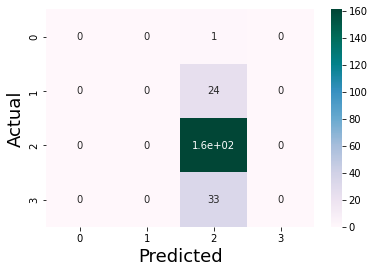

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        24
         4.0       0.74      1.00      0.85       161
         5.0       0.00      0.00      0.00        33

    accuracy                           0.74       219
   macro avg       0.18      0.25      0.21       219
weighted avg       0.54      0.74      0.62       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
svm_clf=svm.SVC().fit(x_train,y_train)
svm_y_pred= svm_clf.predict(x_test)
plot_class_metrics(y_test,svm_y_pred)

In [22]:
svm_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf',  'sigmoid']}

In [23]:
Gridsearch_and_Crossvalidation(svm.SVC,svm_grid)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

[[  0   1   0   0]
 [  0   4  20   0]
 [  0   0 160   1]
 [  0   0  29   4]]


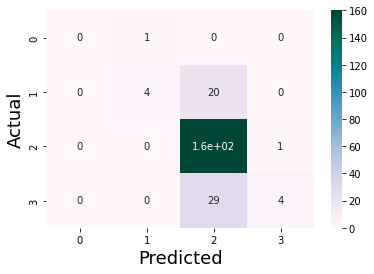

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.80      0.17      0.28        24
         4.0       0.77      0.99      0.86       161
         5.0       0.80      0.12      0.21        33

    accuracy                           0.77       219
   macro avg       0.59      0.32      0.34       219
weighted avg       0.77      0.77      0.70       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
svm_new=svm.SVC(kernel='rbf',C=10,gamma=0.1).fit(x_train,y_train)
svm_new_pred= svm_new.predict(x_test)
plot_class_metrics(y_test,svm_new_pred)

In [25]:

from sklearn.metrics import f1_score
print(f"f1_score={f1_score(y_test, svm_new_pred,average='micro')}")

f1_score=0.7671232876712328


In [26]:
SVM_prediction= svm_new.predict(data2)
SVM_prediction

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4., 3., 4., 5., 4., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 3., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [27]:
prediction = pd.DataFrame(SVM_prediction, columns=['rating']).to_csv('SVM_sample_submission.csv',index=False)
df = pd.read_csv('SVM_sample_submission.csv')

test = pd.read_csv("test_new.csv")
df['id']=test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('SVM_sample_submission.csv',index=False)

##Naive Bayes


[[  1   0   0   0]
 [  8   1  13   2]
 [ 37  11 105   8]
 [ 16   1  15   1]]


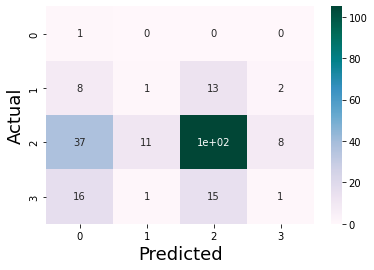

              precision    recall  f1-score   support

         2.0       0.02      1.00      0.03         1
         3.0       0.08      0.04      0.05        24
         4.0       0.79      0.65      0.71       161
         5.0       0.09      0.03      0.05        33

    accuracy                           0.49       219
   macro avg       0.24      0.43      0.21       219
weighted avg       0.60      0.49      0.54       219



In [28]:
NB_clf=GaussianNB().fit(x_train,y_train)
NB_y_pred= NB_clf.predict(x_test)
plot_class_metrics(y_test,NB_y_pred)

In [29]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [30]:
Gridsearch_and_Crossvalidation(GaussianNB,params_NB)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


{'var_smoothing': 1.0}

[[  0   0   1   0]
 [  0   0  24   0]
 [  0   0 159   2]
 [  0   0  32   1]]


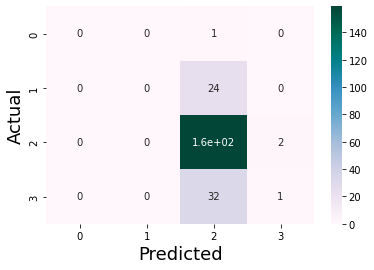

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00        24
         4.0       0.74      0.99      0.84       161
         5.0       0.33      0.03      0.06        33

    accuracy                           0.73       219
   macro avg       0.27      0.25      0.22       219
weighted avg       0.59      0.73      0.63       219



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
NB_new=GaussianNB(var_smoothing=1).fit(x_train,y_train)
NB_new_pred= NB_new.predict(x_test)
plot_class_metrics(y_test,NB_new_pred)

In [32]:

from sklearn.metrics import f1_score
print(f"f1_score={f1_score(y_test, NB_new_pred,average='micro')}")

f1_score=0.730593607305936


In [33]:
NB_prediction= NB_new.predict(data2)
NB_prediction

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [34]:
prediction = pd.DataFrame(SVM_prediction, columns=['rating']).to_csv('NB_sample_submission.csv',index=False)
df = pd.read_csv('NB_sample_submission.csv')

test = pd.read_csv("test_new.csv")
df['id']=test['id']

df_pred = df.reindex(columns=['id','rating'])
df_pred.to_csv('NB_sample_submission.csv',index=False)